In [8]:
import pandas as pd
import datetime as dt
data = pd.read_csv('OnlineRetail.csv',encoding='latin1')

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
data.shape

(541909, 8)

In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
round(100*(data.isnull().sum())/len(data),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [10]:
data['CustomerID'] =data['CustomerID'].astype(str)

In [11]:
data['Amount'] = data['Quantity']*data['UnitPrice']
rfm_m  = data.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [9]:

# Step 1: Calculate the total quantity sold for each product
data['TotalQuantity'] = data['Quantity']
most_sold_item = data.groupby('Description')['TotalQuantity'].sum()
print(most_sold_item)

Description
 4 PURPLE FLOCK DINNER CANDLES     144
 50'S CHRISTMAS GIFT BAG LARGE    1913
 DOLLY GIRL BEAKER                2448
 I LOVE LONDON MINI BACKPACK       389
 I LOVE LONDON MINI RUCKSACK         1
                                  ... 
wrongly marked carton 22804       -256
wrongly marked. 23343 in box     -3100
wrongly sold (22719) barcode       170
wrongly sold as sets              -600
wrongly sold sets                 -975
Name: TotalQuantity, Length: 4223, dtype: int64


In [11]:
# Grouping by Description and calculating the total quantity sold for each product
frequently_sold_products = data.groupby('Description')['InvoiceNo'].count().sort_values(ascending=False)

# Display the top 10 most frequently sold products
print(frequently_sold_products.head(10))

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: InvoiceNo, dtype: int64


In [12]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
last_date = data['InvoiceDate'].max()
last_month = last_date.month
last_month_year = last_date.year
last_month_data = data[(data['InvoiceDate'].dt.month == last_month) & 
                       (data['InvoiceDate'].dt.year == last_month_year)]
total_sales_last_month = last_month_data['Quantity'].sum()

print(f"The total amount of sales recorded in the last month ({last_month_year}-{last_month}) is: {total_sales_last_month}")

The total amount of sales recorded in the last month (2011-12) is: 226333


In [13]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format ='%d-%m-%Y %H:%M')
last_date = data['InvoiceDate'].max()
month_start_day= last_date - pd.Timedelta(days=30)
print(month_start_day)

# Filter data for the last 30 days
last_month_data = data[data['InvoiceDate'] >= month_start_day]

# Calculate the total sales amount for the last 30 days
total_sales_last_month = last_month_data['Quantity'].sum()

print(f"The total amount of sales recorded in the last 30 days is: {total_sales_last_month}")

2011-11-09 12:50:00
The total amount of sales recorded in the last 30 days is: 759554


In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Remove duplicates
data = data.drop_duplicates()

# Convert necessary columns to appropriate data types
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype(str)

# Remove canceled orders (where Quantity is negative)
data = data[data['Quantity'] > 0]
print(data)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  
0      2

In [13]:
# Ensure InvoiceDate is in datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate TotalPrice if not present in the dataset
if 'TotalPrice' not in data.columns:
    data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Set the reference date as the last invoice date in the dataset plus one day
reference_date = data['InvoiceDate'].max() + dt.timedelta(days=1)

# Calculate Recency, Frequency, and Monetary value
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).reset_index()

# Rename columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())


   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          2      0.00
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       19         73   1757.55
4     12350.0      310         17    334.40


In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the Scaler
scaler = StandardScaler()

# Fit and transform the data
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Convert the scaled data back to a DataFrame
rfm_scaled_data = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
print(rfm_scaled_data.head())


    Recency  Frequency  Monetary
0  2.322023  -0.391720 -0.231001
1 -0.893733   0.382657  0.293432
2 -0.169196  -0.266959 -0.012316
3 -0.725005  -0.086271 -0.017146
4  2.163220  -0.327188 -0.190312


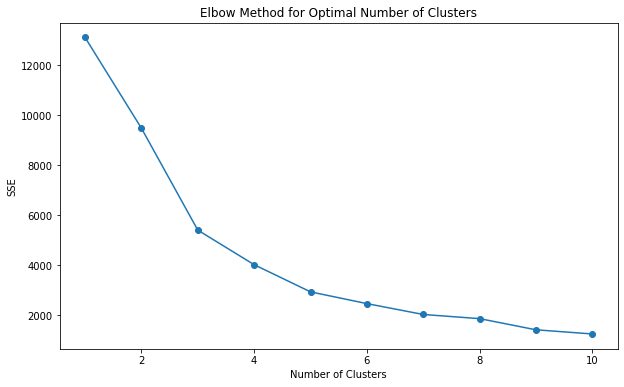

   CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      326          2      0.00        1
1     12347.0        2        182   4310.00        0
2     12348.0       75         31   1797.24        0
3     12349.0       19         73   1757.55        0
4     12350.0      310         17    334.40        1


In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#  optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled_data)

print(rfm.head())


   Cluster    CustomerID     Recency    Frequency       Monetary
0        0  15279.340393   40.027931   105.034377    1994.059792
1        1  15361.575703  246.567543    27.770626     464.787073
2        2  14918.833333    1.666667  4821.500000   55039.933333
3        3  15353.800000    9.000000  1013.400000  192103.854000


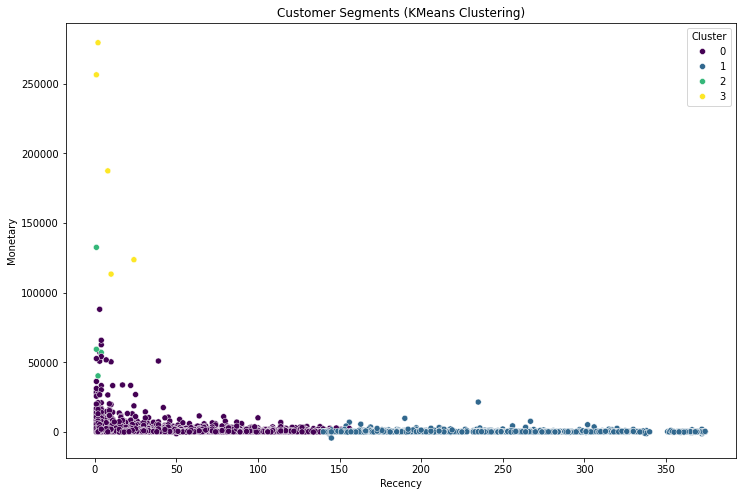

In [17]:
# Group by Cluster and calculate the mean values
cluster_analysis = rfm.groupby('Cluster').mean().reset_index()
print(cluster_analysis)

# Visualize the clusters
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Customer Segments (KMeans Clustering)')
plt.show()
